In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
import pickle

X_train = pickle.load(open("../data/processed/simple-train-test/X_train.p", "rb"))
Y_train = pickle.load(open("../data/processed/simple-train-test/Y_train.p", "rb"))

X_test = pickle.load(open("../data/processed/simple-train-test/X_test.p", "rb"))
Y_test = pickle.load(open("../data/processed/simple-train-test/Y_test.p", "rb"))

In [3]:
print(X_train.shape)
print(Y_train.shape)

(2071, 20561)
(2071,)


In [10]:
X_folds_train = pickle.load(open("../data/processed/author-folds/X_folds_train.p", "rb"))
Y_folds_train = pickle.load(open("../data/processed/author-folds/Y_folds_train.p", "rb"))

X_folds_test = pickle.load(open("../data/processed/author-folds/X_folds_test.p", "rb"))
Y_folds_test = pickle.load(open("../data/processed/author-folds/Y_folds_test.p", "rb"))

In [11]:
X_equpri_train = pickle.load(open("../data/processed/equal-priors-folds/X_equPrior_folds_train.p", "rb"))
Y_equpri_train = pickle.load(open("../data/processed/equal-priors-folds/Y_equPri_folds_train.p", "rb"))

X_equpri_test = pickle.load(open("../data/processed/equal-priors-folds/X_equPrior_folds_test.p", "rb"))
Y_equpri_test = pickle.load(open("../data/processed/equal-priors-folds/Y_equPri_folds_test.p", "rb"))

In [4]:
max_iter = 10e3
C=1.0
penalty='l1'
solver='liblinear'

In [7]:
# Normal Train and Test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=penalty, C=C, max_iter = max_iter, solver=solver)

soln = model.fit(X_train,Y_train)

print("train_acc = " + str(soln.score(X_train,Y_train))) # train accuracy
print("test_acc = " + str(soln.score(X_test,Y_test) ))# train accuracy



train_acc = 0.908256880733945
test_acc = 0.7137404580152672


[[ 52  24  15]
 [  1 223  22]
 [  8  80  99]]


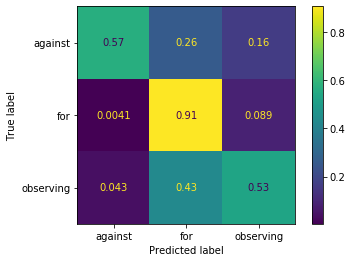

In [8]:
y_pred = soln.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
plot_confusion_matrix(soln, X_test, Y_test, normalize="true")

completed fold => 1
completed fold => 2
completed fold => 3
completed fold => 4
completed fold => 5
completed fold => 6
completed fold => 7
completed fold => 8
completed fold => 9
completed fold => 10


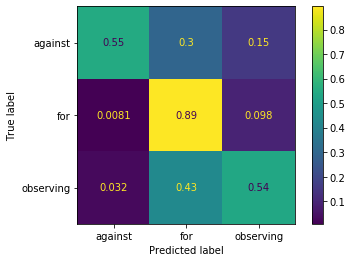

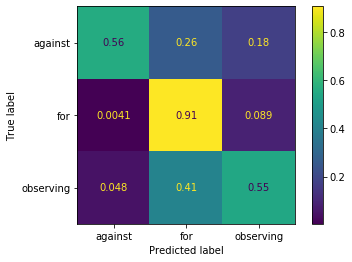

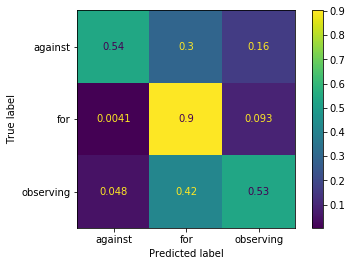

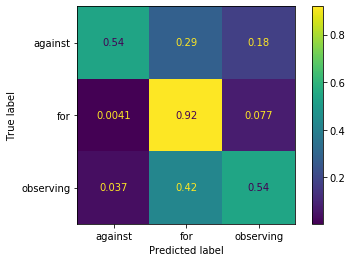

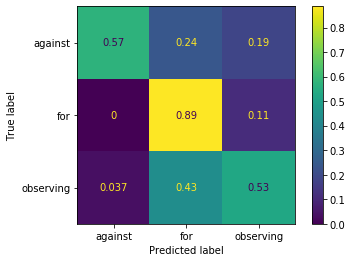

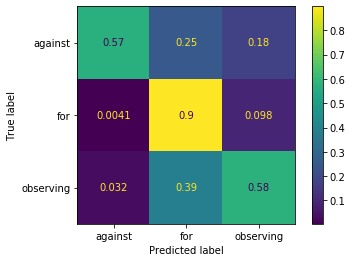

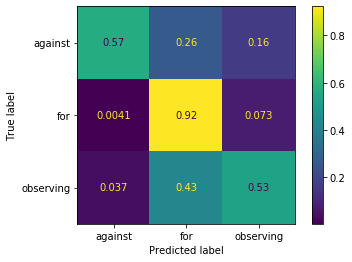

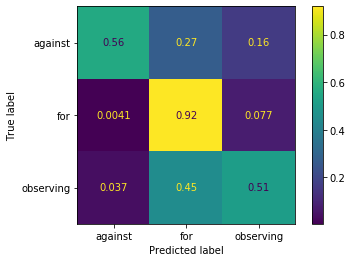

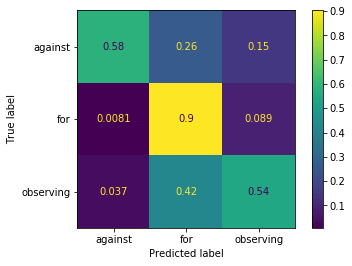

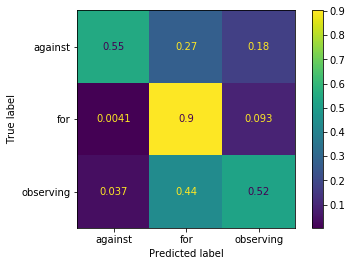

In [12]:
# Train on author's folds
from sklearn.linear_model import LogisticRegression

fold_train_acc = []
fold_test_acc = []
indep_test_acc = []

disp = []

for i in range(10):
    model = LogisticRegression(penalty=penalty, C=C, max_iter = max_iter, solver=solver)
    soln = model.fit(X_folds_train[i], Y_folds_train[i])
    
    fold_train_acc = np.append(fold_train_acc, soln.score(X_folds_train[i], Y_folds_train[i]))
    fold_test_acc = np.append(fold_test_acc, soln.score(X_folds_test[i], Y_folds_test[i]))
    indep_test_acc = np.append(indep_test_acc, soln.score(X_test, Y_test))
    print("completed fold => "+ str(i+1))
    
    disp.append(plot_confusion_matrix(soln, X_test, Y_test, normalize="true"))
    
    
for p in disp:
    p
plt.show()


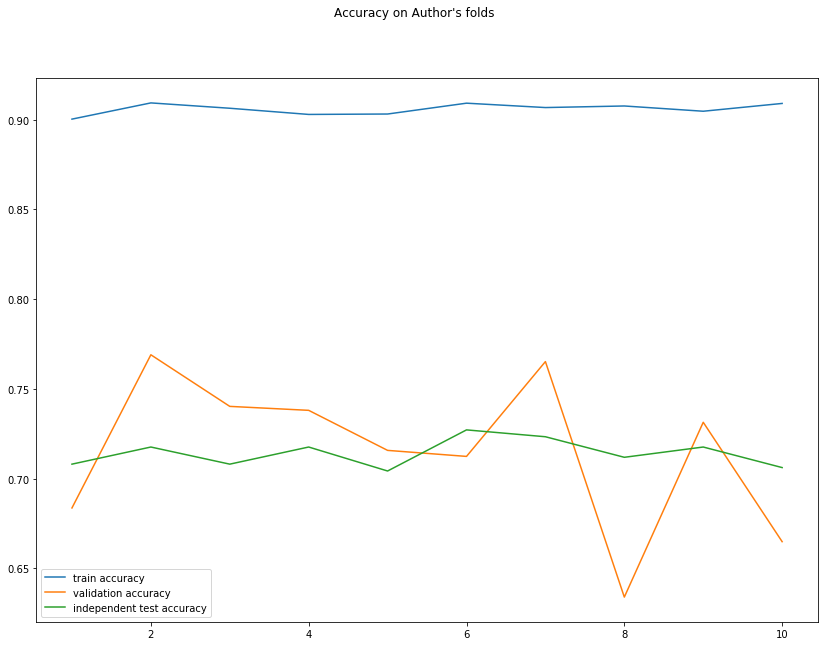

In [13]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('Accuracy on Author\'s folds')
plt.plot(range(1,11), fold_train_acc, label="train accuracy" )
plt.plot(range(1,11), fold_test_acc, label="validation accuracy" )
plt.plot(range(1,11), indep_test_acc, label="independent test accuracy" )
plt.legend()
plt.show()

completed fold => 1
completed fold => 2
completed fold => 3
completed fold => 4
completed fold => 5
completed fold => 6
completed fold => 7
completed fold => 8
completed fold => 9
completed fold => 10


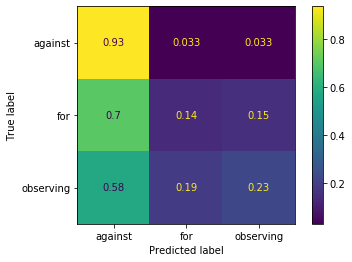

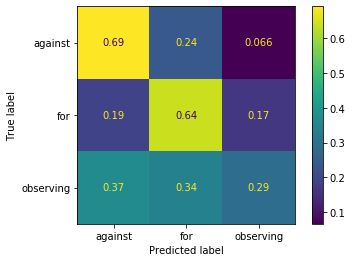

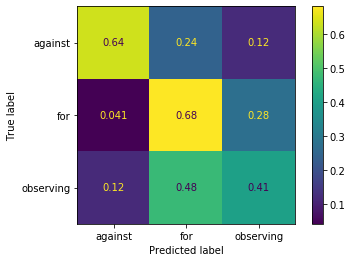

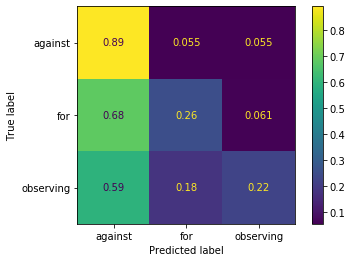

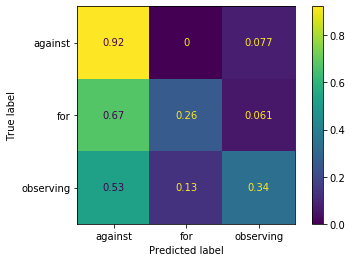

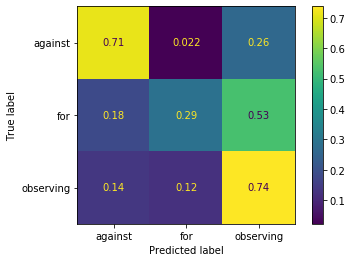

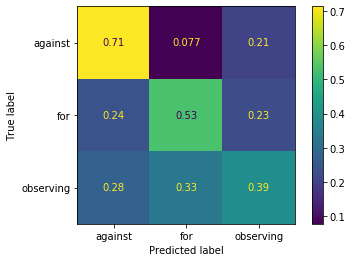

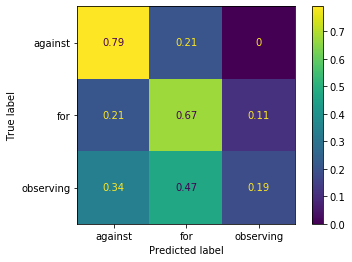

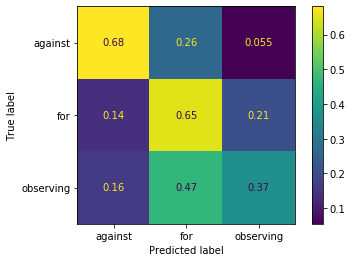

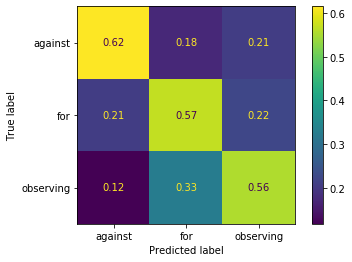

In [19]:
# train on Equal Prior folds
from sklearn.linear_model import LogisticRegression

fold_train_acc = []
fold_test_acc = []
indep_test_acc = []

disp = []

for i in range(10):
    model = LogisticRegression(penalty=penalty, C=C, max_iter = max_iter, solver=solver)
    soln = model.fit(X_equpri_train[i], Y_equpri_train[i])
    
    fold_train_acc = np.append(fold_train_acc, soln.score(X_equpri_train[i], Y_equpri_train[i]))
    fold_test_acc = np.append(fold_test_acc, soln.score(X_equpri_test[i], Y_equpri_test[i]))
    indep_test_acc = np.append(indep_test_acc, soln.score(X_test, Y_test))
    print("completed fold => "+ str(i+1))
    
    disp.append(plot_confusion_matrix(soln, X_test, Y_test, normalize="true"))
    
    
for p in disp:
    p
plt.show()
    


<function matplotlib.pyplot.show(*args, **kw)>

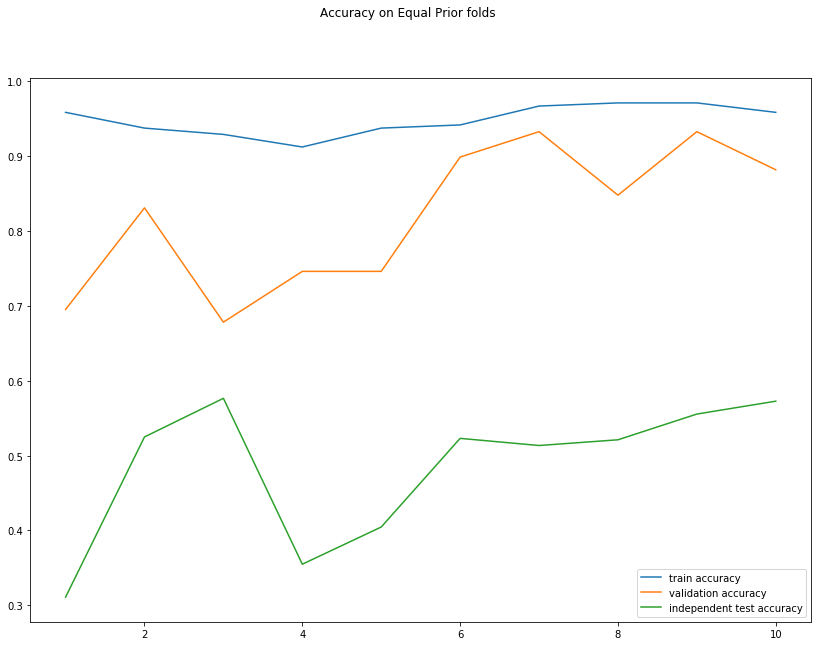

In [22]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('Accuracy on Equal Prior folds')
plt.plot(range(1,11), fold_train_acc, label="train accuracy" )
plt.plot(range(1,11), fold_test_acc, label="validation accuracy" )
plt.plot(range(1,11), indep_test_acc, label="independent test accuracy" )
plt.legend()
plt.show

In [21]:
print(indep_test_acc)


[0.3110687  0.52480916 0.57633588 0.35496183 0.40458015 0.52290076
 0.51335878 0.52099237 0.55534351 0.57251908]


In [5]:
# Load Stratified folds
X_strat_train = []
Y_strat_train = []

X_strat_test = []
Y_strat_test = []


t_folds = np.load('../data/processed/train/train_folds.npz', allow_pickle=True)
v_folds = np.load('../data/processed/valid/valid_folds.npz', allow_pickle=True)

for k in v_folds:
    train_X = t_folds[k][:, :-1] 
    train_y = t_folds[k][:, -1:].reshape((-1,))
    
    valid_x = v_folds[k][:, :-1] 
    valid_y = v_folds[k][:, -1:].reshape((-1,))
    
    X_strat_train.append(train_X)
    Y_strat_train.append(train_y)
    
    X_strat_test.append(valid_x)
    Y_strat_test.append(valid_y)
    

In [6]:
print(np.shape(X_strat_train))


gc.collect()

(10,)


44

completed fold => 1
completed fold => 2
completed fold => 3
completed fold => 4
completed fold => 5
completed fold => 6
completed fold => 7
completed fold => 8
completed fold => 9
completed fold => 10


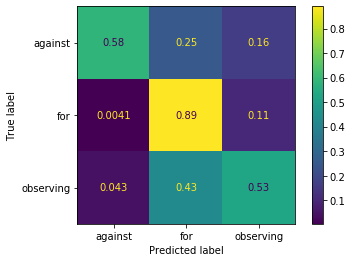

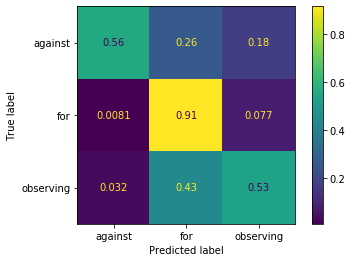

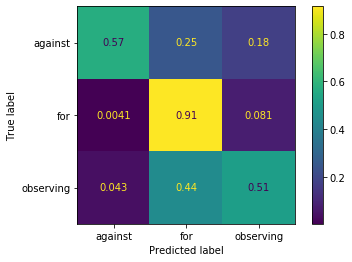

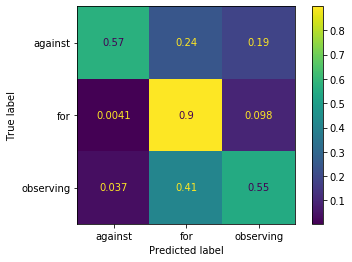

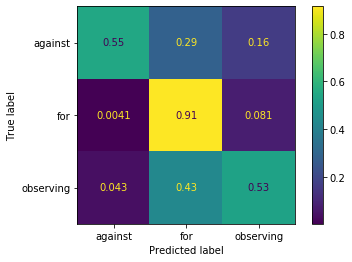

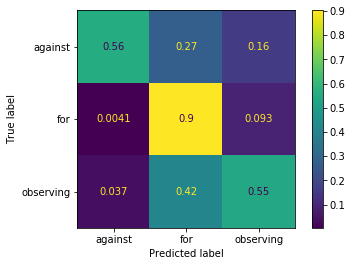

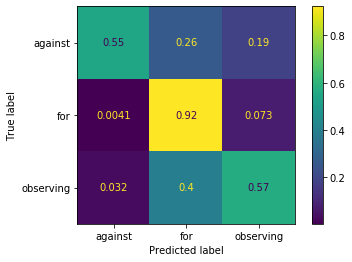

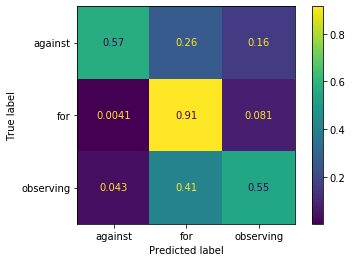

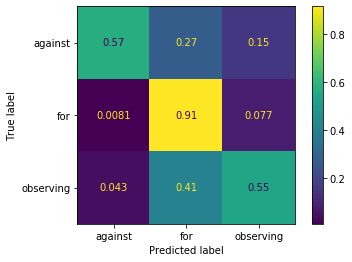

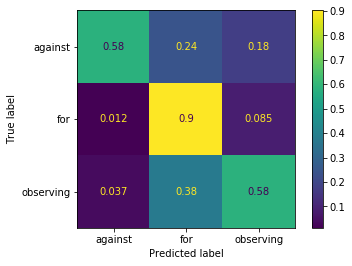

In [7]:


# train on Stratified folds
from sklearn.linear_model import LogisticRegression

fold_train_acc = []
fold_test_acc = []
indep_test_acc = []

disp = []

for i in range(10):
    model = LogisticRegression(penalty=penalty, C=C, max_iter = max_iter, solver=solver)
    soln = model.fit(X_strat_train[i], Y_strat_train[i])
    
    fold_train_acc = np.append(fold_train_acc, soln.score(X_strat_train[i], Y_strat_train[i]))
    fold_test_acc = np.append(fold_test_acc, soln.score(X_strat_test[i], Y_strat_test[i]))
    indep_test_acc = np.append(indep_test_acc, soln.score(X_test, Y_test))
    print("completed fold => "+ str(i+1))
    
    disp.append(plot_confusion_matrix(soln, X_test, Y_test, normalize="true"))
    
    
for p in disp:
    p
plt.show()

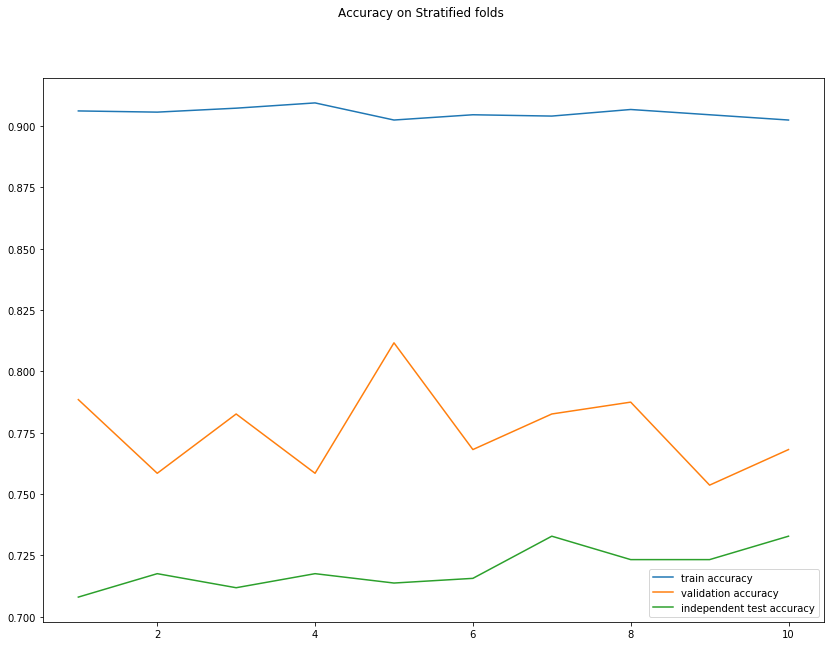

In [9]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('Accuracy on Stratified folds')
plt.plot(range(1,11), fold_train_acc, label="train accuracy" )
plt.plot(range(1,11), fold_test_acc, label="validation accuracy" )
plt.plot(range(1,11), indep_test_acc, label="independent test accuracy" )
plt.legend()
plt.show()